In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC


# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:\\Users\\Akshay\\Desktop\\Ajay Data\\ML_Deployment_Course-28March\\Competition\\CardioVascularDisease\\cardio_train.csv", sep=';')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
data.shape

(69301, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
data.gender.unique()

array([1, 2], dtype=int64)

In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df = data.copy()

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [11]:
def convert_year(cols):
    age_in_days = cols[0]
    
    return int(age_in_days/365)

df['age_yr'] = df[['age']].apply(convert_year, axis=1) 

In [12]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0,61
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1,40
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0,60
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0,39
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0,64


In [13]:
df = df.drop('age',1)

In [14]:
df = df.drop('id',1)

In [15]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
0,1,155,69.0,130,80,2,2,0,0,1,0,61
1,1,163,71.0,110,70,1,1,0,0,1,1,40
2,1,165,70.0,120,80,1,1,0,0,1,0,60
3,2,165,85.0,120,80,1,1,1,1,1,0,39
4,1,155,62.0,120,80,1,1,0,0,1,0,64


In [16]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589,52.840681
std,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003,6.766685
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000


In [17]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


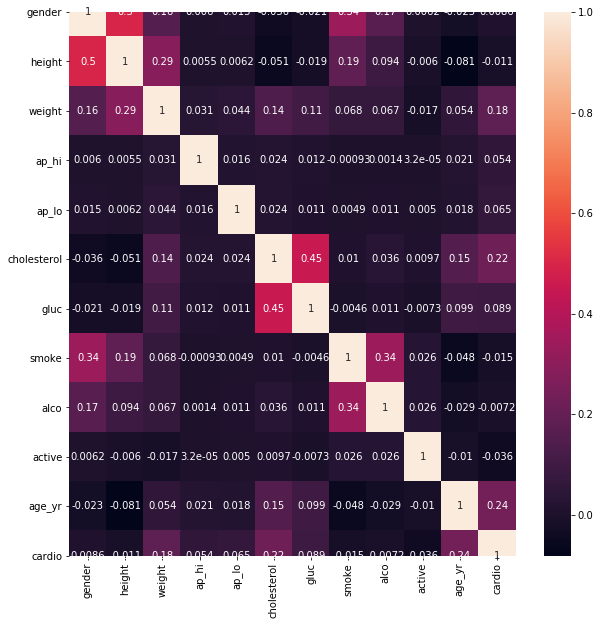

In [18]:
import seaborn as sns

corr_matrices = df.corr()

top_corr_features = corr_matrices.index
top_corr_features = top_corr_features.tolist()
top_corr_features.insert(10,top_corr_features.pop(11))

plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(), annot=True)

In [19]:
df_columns = df.columns.tolist()
print(df_columns)

['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_yr']


In [20]:
numerical_cols = []
binary_cols = []
categroy_cols = []
for col in df_columns:
    print(col, len(df[col].unique()))
    if len(df[col].unique()) > 15:
        numerical_cols.append(col)
    elif len(df[col].unique()) < 3:
        binary_cols.append(col)
    else:
        categroy_cols.append(col)

gender 2
height 108
weight 285
ap_hi 153
ap_lo 157
cholesterol 3
gluc 3
smoke 2
alco 2
active 2
cardio 2
age_yr 28


In [21]:
numerical_cols

['height', 'weight', 'ap_hi', 'ap_lo', 'age_yr']

In [22]:
binary_cols

['gender', 'smoke', 'alco', 'active', 'cardio']

In [23]:
categroy_cols

['cholesterol', 'gluc']

# Numerical Data Analysis

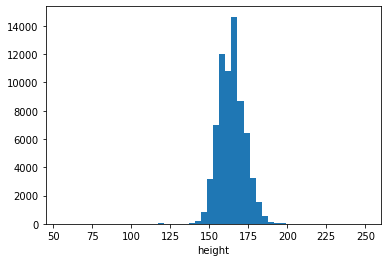

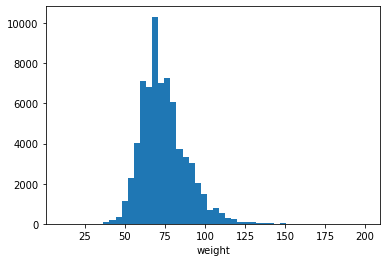

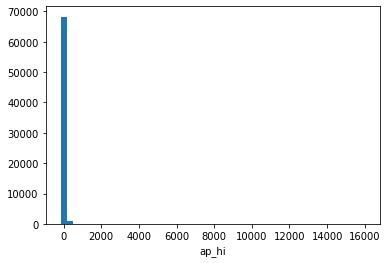

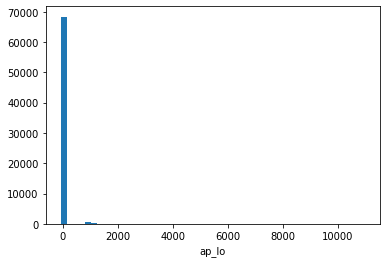

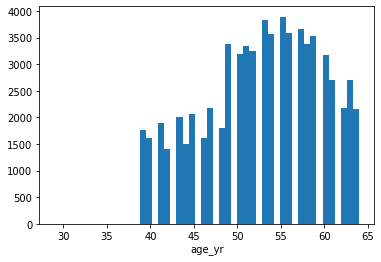

In [24]:
for col in numerical_cols:
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.show()

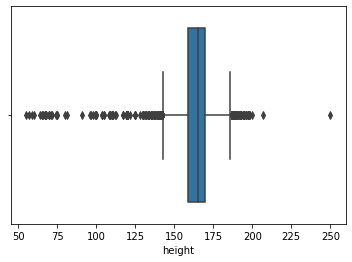

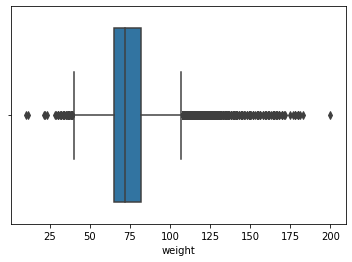

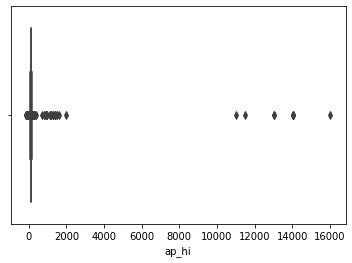

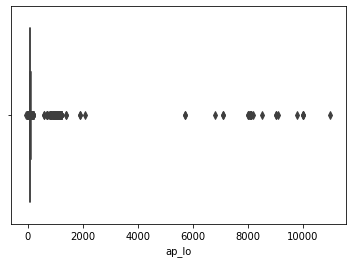

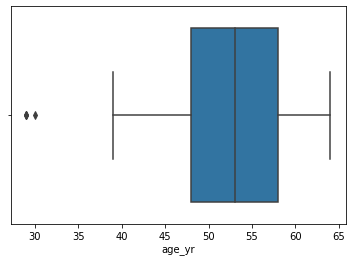

In [25]:
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.show()

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)

In [26]:
numerical_cols

['height', 'weight', 'ap_hi', 'ap_lo', 'age_yr']

## Outlier Analysis for Age_yr

In [27]:
IQR = df.age_yr.quantile(0.75) - df.age_yr.quantile(0.25)
IQR = df['age_yr'].quantile(0.75) - df['age_yr'].quantile(0.25)
print("inter quantile range",IQR)

upper_fence = df.age_yr.quantile(0.75) + (IQR*3)
lower_fence = df.age_yr.quantile(0.25) - (IQR*3)
print(upper_fence, lower_fence)

print("total number of data ", np.float(df.shape[0]))
print("people with age_yr more than 88 ", np.float(df[df['age_yr']>upper_fence].shape[0]))
print("people with age_yr less than 18 ", np.float(df[df['age_yr']<lower_fence].shape[0]))

inter quantile range 10.0
88.0 18.0
total number of data  69301.0
people with age_yr more than 88  0.0
people with age_yr less than 18  0.0


## Outlier Analysis for height

In [28]:
## Height and weight these 2 features are some what similar to gaussian distribution.

Upper_boundary = data.height.mean() + 3* data.height.std()
Lower_boundary = data.height.mean() - 3* data.height.std()

print(Upper_boundary, Lower_boundary)

print("total number of data ", np.float(df.shape[0]))
print("people with height more than 188 ", np.float(df[df['height']>Upper_boundary].shape[0]))
print("people with height less than 139 ", np.float(df[df['height']<Lower_boundary].shape[0]))

188.9782281215963 139.7462058692552
total number of data  69301.0
people with height more than 188  141.0
people with height less than 139  151.0


## Outlier Analysis for weight

In [29]:
## Height and weight these 2 features are some what similar to gaussian distribution.

Upper_boundary = data.weight.mean() + 4* data.height.std()
Lower_boundary = data.weight.mean() - 4* data.height.std()

print(Upper_boundary, Lower_boundary)

print("total number of data ", np.float(df.shape[0]))
print("people with weight more than 107 ", np.float(df[df['weight']>Upper_boundary].shape[0]))
print("people with weight less than 41 ", np.float(df[df['weight']<Lower_boundary].shape[0]))

107.0243755415698 41.38167920511499
total number of data  69301.0
people with weight more than 107  1750.0
people with weight less than 41  130.0


## Outlier Analysis for ap_hi

In [30]:
IQR = df.ap_hi.quantile(0.75) - df.ap_hi.quantile(0.25)
print("inter quantile range",IQR)

upper_fence = df.ap_hi.quantile(0.75) + (IQR*3.5)
lower_fence = df.ap_hi.quantile(0.25) - (IQR*3.5)
print(upper_fence, lower_fence)

print("total number of data ", np.float(df.shape[0]))
print("people with ap_hi more than 210 ", np.float(df[df['ap_hi']>upper_fence].shape[0]))
print("people with ap_hi less than 50 ", np.float(df[df['ap_hi']<lower_fence].shape[0]))

inter quantile range 20.0
210.0 50.0
total number of data  69301.0
people with ap_hi more than 210  74.0
people with ap_hi less than 50  187.0


## Outlier Analysis for ap_lo

In [31]:
IQR = df.ap_lo.quantile(0.75) - df.ap_lo.quantile(0.25)
print("inter quantile range",IQR)

upper_fence = df.ap_lo.quantile(0.75) + (IQR*3.5)
lower_fence = df.ap_lo.quantile(0.25) - (IQR*3.5)
print(upper_fence, lower_fence)

print("total number of data ", np.float(df.shape[0]))
print("people with ap_lo more than 125 ", np.float(df[df['ap_lo']>upper_fence].shape[0]))
print("people with ap_lo less than 45 ", np.float(df[df['ap_lo']<lower_fence].shape[0]))

inter quantile range 10.0
125.0 45.0
total number of data  69301.0
people with ap_lo more than 125  1041.0
people with ap_lo less than 45  74.0


## Replace the Outlier values with Boundry Values

In [32]:
df.loc[df.ap_lo > 125, 'ap_lo'] = 125
df.loc[df.ap_lo < 45, 'ap_lo'] = 45

df.loc[df.ap_hi > 210, 'ap_hi'] = 210
df.loc[df.ap_hi < 50, 'ap_hi'] = 50

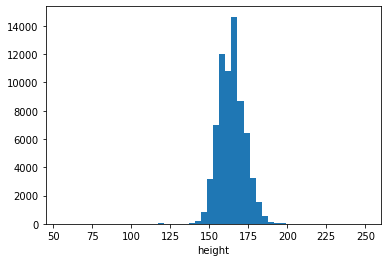

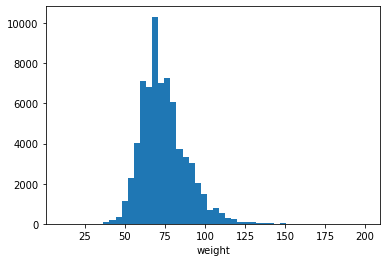

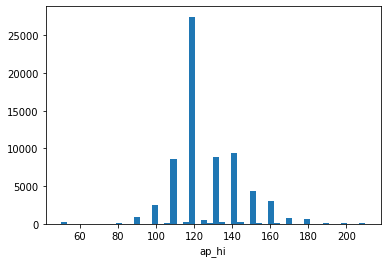

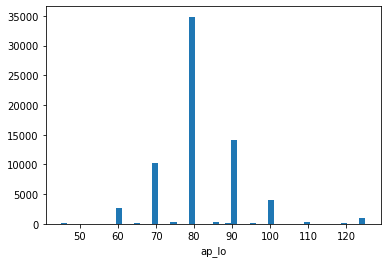

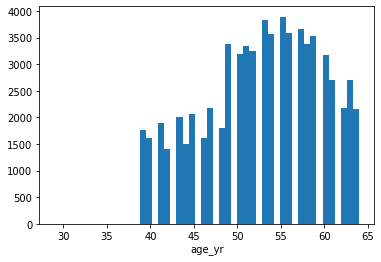

In [33]:
for col in numerical_cols:
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.show()

In [34]:
temp_dataset = df.copy()

In [35]:
temp_dataset.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_yr
0,1,155,69.0,130,80,2,2,0,0,1,0,61
1,1,163,71.0,110,70,1,1,0,0,1,1,40
2,1,165,70.0,120,80,1,1,0,0,1,0,60
3,2,165,85.0,120,80,1,1,1,1,1,0,39
4,1,155,62.0,120,80,1,1,0,0,1,0,64


In [36]:
temp_dataset = temp_dataset[['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol','gluc', 'smoke', 'alco', 'active', 'age_yr', 'cardio']]

In [37]:
temp_dataset.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_yr,cardio
0,1,155,69.0,130,80,2,2,0,0,1,61,0
1,1,163,71.0,110,70,1,1,0,0,1,40,1
2,1,165,70.0,120,80,1,1,0,0,1,60,0
3,2,165,85.0,120,80,1,1,1,1,1,39,0
4,1,155,62.0,120,80,1,1,0,0,1,64,0


## Feature Importance

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = temp_dataset.iloc[:,0:11] # independent columns
y = temp_dataset.iloc[:,-1] # target column, cardio


# apply chi square t method to select top 10 features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

In [39]:
fit.scores_

array([8.61949254e-01, 3.44407553e+00, 6.40662970e+03, 2.91758453e+04,
       1.08683017e+04, 1.14339804e+03, 1.46767758e+02, 1.46492569e+01,
       3.41535083e+00, 1.72080347e+01, 3.39891193e+03])

In [40]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [41]:
featurescores = pd.concat([dfcolumns, dfscores], axis=1)
featurescores.columns = ['specs','score']

In [42]:
print(featurescores.nlargest(10,'score'))

          specs         score
3         ap_hi  29175.845261
4         ap_lo  10868.301744
2        weight   6406.629698
10       age_yr   3398.911933
5   cholesterol   1143.398041
6          gluc    146.767758
9        active     17.208035
7         smoke     14.649257
1        height      3.444076
8          alco      3.415351


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [44]:
print(model.feature_importances_)

[0.00943993 0.23169331 0.24136949 0.17858375 0.10831853 0.04392169
 0.01270057 0.00479059 0.00446094 0.00695445 0.15776675]


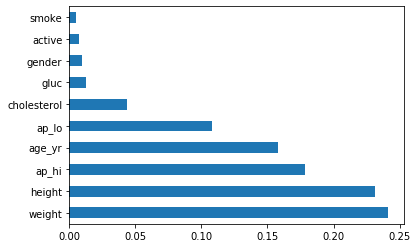

In [45]:
feat_imps = pd.Series(model.feature_importances_, index=X.columns)
feat_imps.nlargest(10).plot(kind='barh')

## Feature Analysis

In [46]:
print(binary_cols)
print(categroy_cols)

['gender', 'smoke', 'alco', 'active', 'cardio']
['cholesterol', 'gluc']


## Gender Vs Cardio

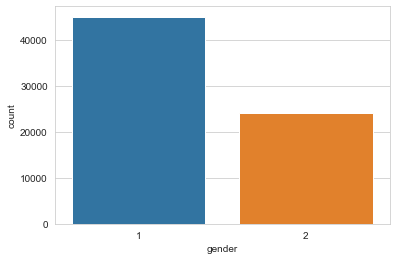

In [47]:
sns.set_style("whitegrid")
sns.countplot(x='gender', data=df)

In [82]:
df['gender'].value_counts()

1    45079
2    24222
Name: gender, dtype: int64

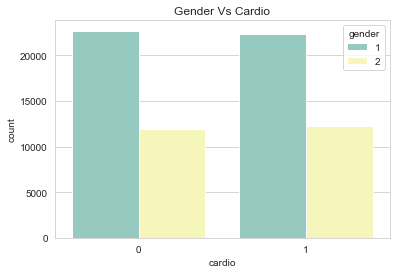

In [48]:
sns.set_style("whitegrid")
plt.title('Gender Vs Cardio')
sns.countplot(x='cardio', hue='gender', data=df, palette="Set3")

## smoke Vs Cardio

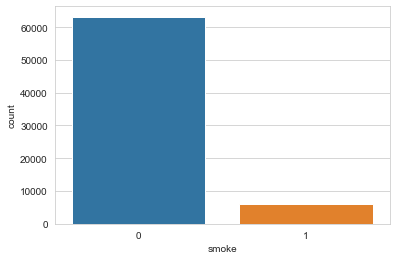

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='smoke',data=df)

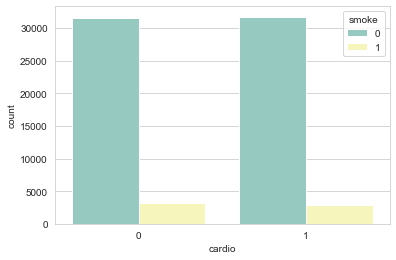

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='cardio', hue='smoke', data=df, palette="Set3")

## alco Vs cardio

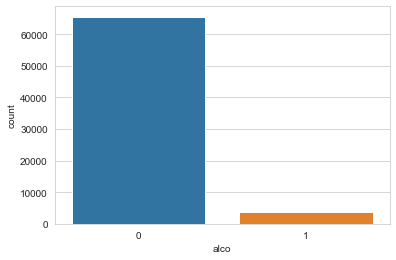

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='alco',data=df)

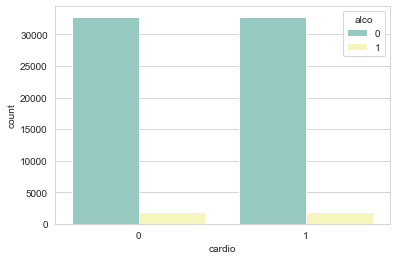

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='cardio', hue='alco', data=df, palette="Set3")

## active Vs cardio

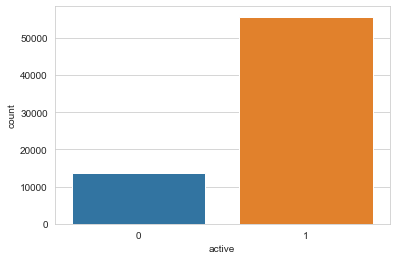

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='active',data=df)

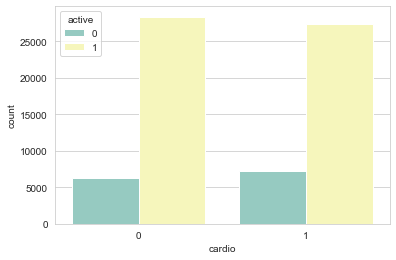

In [54]:
sns.set_style('whitegrid')
sns.countplot(x='cardio', hue='active',data=df, palette='Set3')

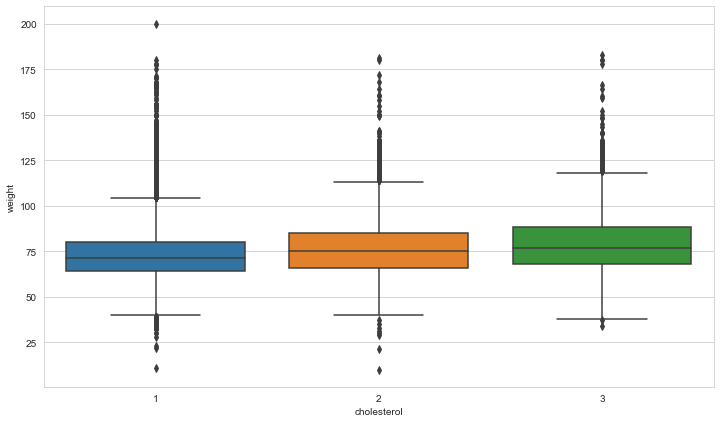

In [55]:
plt.figure(figsize=(12,7))
sns.boxplot(x='cholesterol', y='weight', data=df)

Average weight for people with normal cholesterol is less than 75
and Average weight for people with higher cholesterol is greater than 76

## Handling Categorical data

In [56]:
categroy_cols

['cholesterol', 'gluc']

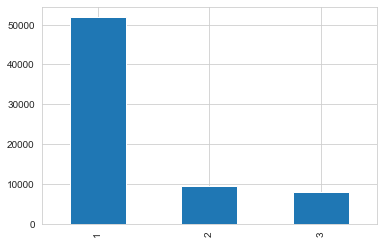

In [57]:
df['cholesterol'].value_counts().plot(kind='bar')

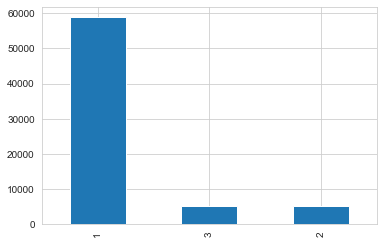

In [58]:
df['gluc'].value_counts().plot(kind='bar')

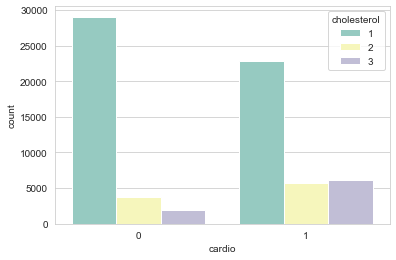

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='cardio', hue='cholesterol',data=df, palette='Set3')

Observation -

Ratio is high for cholestrol in people suffring from cardiovascular disease

In [60]:
dataset = pd.get_dummies(df, columns=categroy_cols)

In [61]:
dataset.drop('alco', axis=1, inplace=True)

In [62]:
dataset['gender'].replace({2:0}, inplace=True)

In [81]:
dataset.head(10)

,gender,height,weight,ap_hi,ap_lo,smoke,active,cardio,age_yr,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
0,1,155,69.0,130,80,0,1,0,61,0,1,0,0,1,0
1,1,163,71.0,110,70,0,1,1,40,1,0,0,1,0,0
2,1,165,70.0,120,80,0,1,0,60,1,0,0,1,0,0
3,0,165,85.0,120,80,1,1,0,39,1,0,0,1,0,0
4,1,155,62.0,120,80,0,1,0,64,1,0,0,1,0,0
5,1,164,61.0,100,70,0,1,0,57,1,0,0,1,0,0
6,1,162,72.0,100,70,0,1,0,49,1,0,0,1,0,0
7,1,161,93.0,140,90,0,1,1,61,0,1,0,1,0,0
8,1,157,68.0,110,80,0,1,0,58,1,0,0,1,0,0
9,1,158,65.0,140,90,0,1,1,61,0,0,1,1,0,0


In [64]:
# Let's separate into train and test set
# to divide train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, dataset.cardio, test_size=0.2,random_state=0)
X_train.shape, X_test.shape

((55440, 15), (13861, 15))

In [65]:
training_vars = [var for var in X_train.columns if var not in ['cardio']]
print(training_vars)

['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'smoke', 'active', 'age_yr', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1', 'gluc_2', 'gluc_3']


## Model Evaluations

#### XGBClassifier

In [66]:
xgb_model = xgb.XGBClassifier(n_estimators=100,learning_rate=0.3)

eval_set = [(X_test[training_vars], y_test)]
xgb_model.fit(X_train[training_vars], y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train[training_vars])
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test[training_vars])
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

predictions = xgb_model.predict(X_train[training_vars])
print("xgb train accuracy", accuracy_score(y_train, predictions))
predictions = xgb_model.predict(X_test[training_vars])
print("xgb test accuracy", accuracy_score(y_test, predictions))

print(xgb_model.score(X_train[training_vars], y_train))
print(xgb_model.score(X_test[training_vars], y_test))

xgb train roc-auc: 0.8398186060242977
xgb test roc-auc: 0.7969373028793112
xgb train accuracy 0.7626262626262627
xgb test accuracy 0.7344347449678955
0.7626262626262627
0.7344347449678955


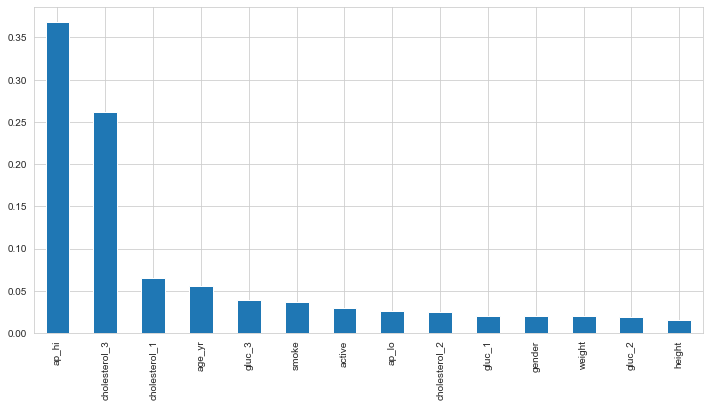

In [67]:
feat_imps = pd.Series(xgb_model.feature_importances_, index=X_train[training_vars].columns)
feat_imps.nlargest(14).plot.bar(figsize=(12,6))

#### AdaBoostClassifier

In [68]:
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=200,learning_rate=0.5)
ada_model.fit(X_train[training_vars], y_train)

pred = ada_model.predict_proba(X_train[training_vars])
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test[training_vars])
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

predictions = ada_model.predict(X_train[training_vars])
print("Adaboost train accuracy", accuracy_score(y_train, predictions))
predictions = ada_model.predict(X_test[training_vars])
print("Adaboost test accuracy", accuracy_score(y_test, predictions))


print(ada_model.score(X_train[training_vars], y_train))
print(ada_model.score(X_test[training_vars], y_test))

Adaboost train roc-auc: 0.8094974315144673
Adaboost test roc-auc: 0.799297723193585
Adaboost train accuracy 0.7402597402597403
Adaboost test accuracy 0.735589062838179
0.7402597402597403
0.735589062838179


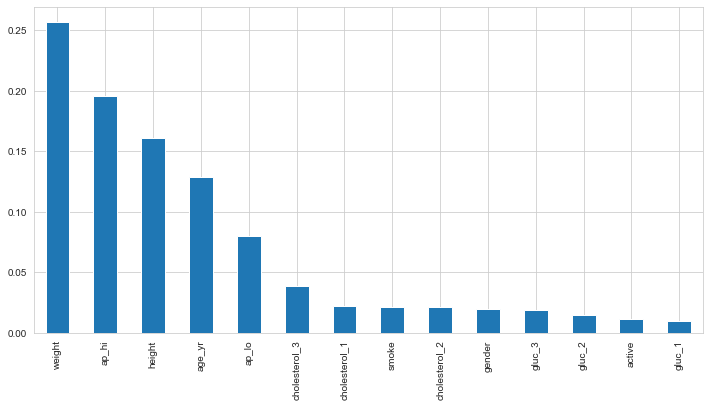

In [69]:
feat_imps = pd.Series(ada_model.feature_importances_, index=X_train[training_vars].columns)
feat_imps.nlargest(14).plot.bar(figsize=(12,6))

In [70]:
ada_model.feature_importances_

array([0.01960136, 0.16103952, 0.25655967, 0.19536651, 0.08025526,
       0.02161657, 0.01124601, 0.12889224, 0.02186664, 0.02156866,
       0.03878265, 0.00943781, 0.01458666, 0.01918044])

In [71]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [72]:
print(precision_score(y_test, predictions, average="macro"))

0.7362903622438768


In [73]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.72273289 0.74984784]
recall: [0.76215278 0.70916679]
fscore: [0.74191958 0.72894017]
support: [6912 6949]


# After hyperparams tuning we have decided to go with AdaBoostClassifier